In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [75]:
def find_corners(filename: str, index: int):
    gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    # cornerHarris
    # Input single-channel 8-bit or floating-point image
    # blockSize – Neighborhood size. For every pixel p , the function considers a blockSize*blockSize neighborhood S(p)
    # ksize – Aperture parameter for the Sobel() operator.
    # k – Harris detector free parameter. See the formula below.
    # borderType – Pixel extrapolation method, one of the BORDER_* ,
    # except for BORDER_TRANSPARENT and BORDER_ISOLATED .
    # When borderType==BORDER_CONSTANT , the function always returns -1, regardless of p and len
    #  for each pixel (x, y) it calculates a 2*2 gradient covariance matrix M^{(x,y)}
    #  over a blockSize*blockSize neighborhood. Then, it computes the following characteristic:
    # tt{dst} (x,y) =  \mathrm{det} M^{(x,y)} - k  \cdot \left ( \mathrm{tr} M^{(x,y)} \right )^2
    # Corners in the image can be found as the local maxima of this response map.

    corners = cv2.cornerHarris(gray, 2, 3, 0.05, borderType=cv2.BORDER_DEFAULT)

    output = cv2.imread(filename)
    threshold = 0.1 * corners.max()
    output[corners > threshold] = [255, 0, 0]
    
    large_corners = (corners > threshold).sum()
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(output, "corner count:" + str(large_corners), (10, 12), font, 0.5, 255)
    plt.figure(index * 100 + 1)
    plt.title(filename)
    plt.imshow(output)
    plt.show()

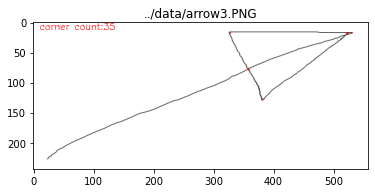

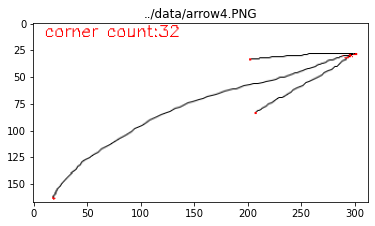

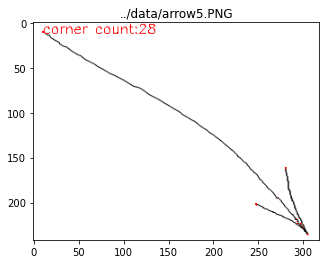

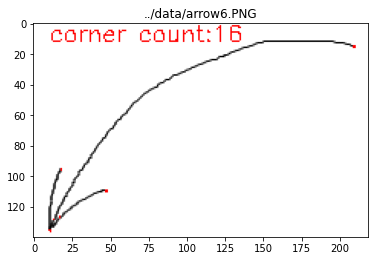

In [76]:
find_corners("../data/arrow3.PNG", 1)
find_corners("../data/arrow4.PNG", 2)
find_corners("../data/arrow5.PNG", 3)
find_corners("../data/arrow6.PNG", 4)